<a href="https://colab.research.google.com/github/ssudhanshu488/ml_models_template/blob/main/Sentimental_analysis_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kaggle
!chmod 600 /content/kaggle.json

ERROR: Operation cancelled by user


In [3]:
!kaggle datasets download -d suchintikasarkar/sentiment-analysis-for-mental-health

Dataset URL: https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health
License(s): DbCL-1.0
sentiment-analysis-for-mental-health.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip /content/sentiment-analysis-for-mental-health.zip

Archive:  /content/sentiment-analysis-for-mental-health.zip
  inflating: Combined Data.csv       


In [4]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Combined Data.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
df

In [6]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [8]:
df.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [9]:
df = df[df['statement'].notnull()]# Removing Rows having NUll Statement values

In [10]:
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [11]:
df['status']

,status
0,Anxiety
1,Anxiety
2,Anxiety
3,Anxiety
4,Anxiety
...,...
53038,Anxiety
53039,Anxiety
53040,Anxiety
53041,Anxiety


In [13]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [12]:
x=df.iloc[:, -1].values
y=df.iloc[:, 0:2]
x

array(['Anxiety', 'Anxiety', 'Anxiety', ..., 'Anxiety', 'Anxiety',
       'Anxiety'], dtype=object)

In [14]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

ohe = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), ['status'])], remainder='passthrough')
df= ohe.fit_transform(df)
df= pd.DataFrame(df)
df.rename(columns={0: 'Anxiety', 1: 'Normal', 2: 'Depression', 3: 'Suicidal', 4: 'Stress', 5: 'Bipolar', 6: 'Personality disorder', 7:'Unnamed: 0', 8:'Statement'}, inplace=True)

In [15]:
df

,Anxiety,Normal,Depression,Suicidal,Stress,Bipolar,Personality disorder,Unnamed: 0,Statement
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,oh my gosh
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,"trouble sleeping, confused mind, restless hear..."
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,"All wrong, back off dear, forward doubt. Stay ..."
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,I've shifted my focus to something else but I'...
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,"I'm restless and restless, it's been a month n..."
...,...,...,...,...,...,...,...,...,...
52676,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53038,Nobody takes me seriously I’ve (24M) dealt wit...
52677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53039,"selfishness ""I don't feel very good, it's lik..."
52678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53040,Is there any way to sleep better? I can't slee...
52679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53041,"Public speaking tips? Hi, all. I have to give ..."


In [16]:
(df['Unnamed: 0'].unique()).shape

(52681,)

In [17]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
df

,Anxiety,Normal,Depression,Suicidal,Stress,Bipolar,Personality disorder,Statement
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,oh my gosh
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"trouble sleeping, confused mind, restless hear..."
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"All wrong, back off dear, forward doubt. Stay ..."
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,I've shifted my focus to something else but I'...
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"I'm restless and restless, it's been a month n..."
...,...,...,...,...,...,...,...,...
52676,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Nobody takes me seriously I’ve (24M) dealt wit...
52677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"selfishness ""I don't feel very good, it's lik..."
52678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Is there any way to sleep better? I can't slee...
52679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"Public speaking tips? Hi, all. I have to give ..."


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52681 entries, 0 to 52680
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Anxiety               52681 non-null  object
 1   Normal                52681 non-null  object
 2   Depression            52681 non-null  object
 3   Suicidal              52681 non-null  object
 4   Stress                52681 non-null  object
 5   Bipolar               52681 non-null  object
 6   Personality disorder  52681 non-null  object
 7   Statement             52681 non-null  object
dtypes: object(8)
memory usage: 3.2+ MB


In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#Data Preprocessing

In [22]:
# df['num_words'] = df['Statement'].apply(lambda x: len(nltk.word_tokenize(x)))
# df['num_charachters']=df['Statement'].apply(len)
# df['num_sentences']=df['Statement'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
df['Anxiety'].dtype

dtype('O')

In [22]:
df['Statement'].values

array(['oh my gosh',
       'trouble sleeping, confused mind, restless heart. All out of tune',
       'All wrong, back off dear, forward doubt. Stay in a restless and restless place',
       ...,
       "Is there any way to sleep better? I can't sleep most of the nights, meds didn't help.",
       'Public speaking tips? Hi, all. I have to give a presentation at work next week (45 minutes long and the CEO will be in attendance). I’m already panicking, as once the anxiety kicks in, I’m certain I’m going to forget everything I’m supposed to say. ( anxiety makes it very difficult for me to focus on anything) Does anyone have any speaking tips that have worked for them in the past? Thanks so much!',
       "I have really bad door anxiety! It's not about being scared I didn't lock the door or something, I'm just really scared of opening doors the wrong way or turning a key the wrong way in front of people or pushing instead of pulling and viceversa, it's honestly debilitating because i feel

In [23]:
columns_to_convert = ['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Personality disorder']

# Convert each column to numeric (either int or float)
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


<Axes: >

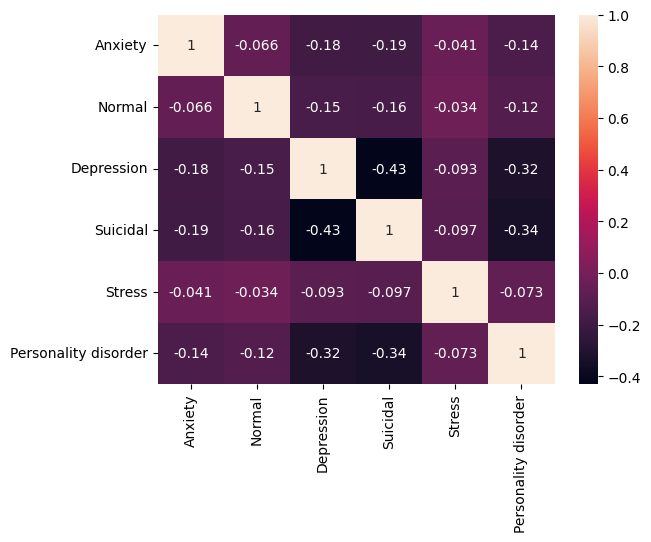

In [24]:
import seaborn as sns

# Selecting both float and integer columns
numeric_df = df.select_dtypes(include=['float', 'int'])

# Calculating correlation matrix for numeric columns
sns.heatmap(numeric_df.corr(), annot=True)

In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
nltk.word_tokenize("Hello world! This is a test @example12.")

['Hello', 'world', '!', 'This', 'is', 'a', 'test', '@', 'example12', '.']

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Load stop words once
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    text = nltk.word_tokenize(text)

    # Filter out non-alphanumeric words and stopwords, then stem the remaining words
    y = [stemmer.stem(word) for word in text if word.isalnum() and word not in stop_words]

    return" ".join(y)

In [31]:
!pip install pandarallel

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16675 sha256=34276671cc38837811815b4ce2eb44376ed962669acad0e63efa6b088d018542
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [28]:
from pandarallel import pandarallel
pandarallel.initialize()

# Apply the function in parallel
df['words_list'] = df['Statement'].parallel_apply(transform_text)


INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [33]:
transform_text('Hello world! This is a test @examplee')

'hello world test example'

In [34]:
df

,Anxiety,Normal,Depression,Suicidal,Stress,Bipolar,Personality disorder,Statement,words_list
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,oh my gosh,oh gosh
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"trouble sleeping, confused mind, restless hear...",troubl sleep confus mind restless heart tune
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"All wrong, back off dear, forward doubt. Stay ...",wrong back dear forward doubt stay restless re...
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,I've shifted my focus to something else but I'...,shift focu someth els still worri
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"I'm restless and restless, it's been a month n...",restless restless month boy mean
...,...,...,...,...,...,...,...,...,...
52676,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Nobody takes me seriously I’ve (24M) dealt wit...,nobodi take serious 24m dealt year use great p...
52677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"selfishness ""I don't feel very good, it's lik...",selfish feel good like belong world think ever...
52678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Is there any way to sleep better? I can't slee...,way sleep better ca sleep night med help
52679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"Public speaking tips? Hi, all. I have to give ...",public speak tip hi give present work next wee...


In [35]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=1000, min_font_size=10, background_color='white')


In [36]:
type(df['words_list'][1])

str

In [37]:
df[df['Anxiety']==1]['words_list'].str.cat(sep=",")

'oh gosh,troubl sleep confus mind restless heart tune,wrong back dear forward doubt stay restless restless place,shift focu someth els still worri,restless restless month boy mean,everi break must nervou like someth wrong heck,feel scare anxiou may famili us protect,ever felt nervou know,slept well 2 day like restless huh,realli worri want cri,alway restless everi night even though know wrong strang,confus feel good late everi time want sleep alway feel restless,sometim need problem laugh forget problem rememb feel restless like well turn still sad burden blah blah blah,worri,sometim thought make anxiou afraid close eye sleep,everi time wake definit nervou excit go tri,hope even though worri start like,restiv restless restless,regret thing pass worri much futur true seren,guy sick girl actual feel sick indirectli must feel restless restless,anxiou person becam sincer person also worri person end,success onlin 9am even sleep state restless wrong,ca sleep restless natur,alreadi worri pic

In [38]:
df['words_list']=df['words_list'].astype(str)
Anx_wc=wc.generate(df[df['Anxiety']==1]['words_list'].str.cat(sep=" "))

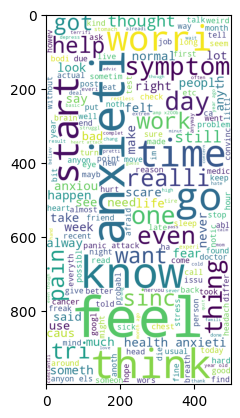

In [39]:
import matplotlib.pyplot as plt
plt.imshow(Anx_wc);

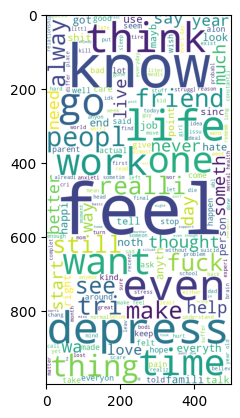

In [40]:
df['words_list']=df['words_list'].astype(str)
Dep_wc=wc.generate(df[df['Depression']==1]['words_list'].str.cat(sep=" "))
import matplotlib.pyplot as plt
plt.imshow(Dep_wc);

#Model training

In [41]:
y=df.iloc[:, 0:7]
x=df['words_list']

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(df['words_list']).toarray()

In [43]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.utils import shuffle

# Shuffle and sample 10,000 rows
x, y = shuffle(x, y, random_state=42)
x, y = x[:10000], y[:10000]


In [1]:
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test=train_test_split(x, y, test_size=0.5, random_state=2)

from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train, y_train)

NameError: name 'x' is not defined

In [ ]:
y_pred=mnb.predict(x_test)
print(confusion_matrix(y_test, y_pred))